In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Task 1: Data exploration and cleaning               



In [ ]:
# --------------------------------------------------------------
# 1. Find and Download a Dataset
# --------------------------------------------------------------

# https://www.kaggle.com/datasets/shivamb/mount-everest-climbing-deaths

In [3]:
# --------------------------------------------------------------
# 2. Data Exploration
# --------------------------------------------------------------

me_climbing_deaths = pd.read_csv("../OLA-1/data/raw/me_climbing_deaths.csv")

df = me_climbing_deaths

# Dropping the "No."" col, since we already have indexes
df = df.drop("No.", axis=1)

# Shows that 2-6 columns have missing values, and "Age" is the only numeric data type.
df.info()

# Shows statistics of the data
df.describe()  # "Age" is only shown here since it's the only numeric dtype.
df.describe(include="all")

df.head()
df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            310 non-null    object 
 1   Date            310 non-null    object 
 2   Age             160 non-null    float64
 3   Expedition      271 non-null    object 
 4   Nationality     309 non-null    object 
 5   Cause of death  296 non-null    object 
 6   Location        291 non-null    object 
dtypes: float64(1), object(6)
memory usage: 17.1+ KB


,Name,Date,Age,Expedition,Nationality,Cause of death,Location
305,Christopher Jon Kulish,"May 27, 2019",62.0,Climbing the Seven Summits,United States,Cardiac event during descent,South Col
306,Puwei Liu,"May 12, 2021",55.0,Seven Summit Treks,United States,Exhaustion,Near South Summit
307,Abdul Waraich,"May 12, 2021",41.0,Seven Summit Treks,Switzerland,Exhaustion,Near South Summit
308,Pemba Tashi Sherpa,"May 18, 2021",28.0,Climbing the Seven Summits,Nepal,Fall into a crevasse,Between Camp I & Camp II
309,Wong Dorchi Sherpa,"May 23, 2021",NaN,7 Summits Club,Nepal,NaN,near South Col


In [4]:
# --------------------------------------------------------------
# 3. Data Cleaning
# --------------------------------------------------------------

### DROP EXTREME OUTLIERS ###
outlier_columns = list(df.columns[:8])

def mark_outliers_iqr(dataset, col):
    """
    Function to mark values as outliers using the IQR (Interquartile Range) method.

    Explanation:
    A common method is to use the Interquartile Range (IQR),
    which is the range between the first quartile (25%) and the third quartile (75%)
    of the data. Outliers are often considered as data points that lie outside 1.5 times
    the IQR below the first quartile and above the third quartile.

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column
        indicating whether the value is an outlier or not.
    """

    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataset[col + "_outlier"] = ~dataset[col].between(lower_bound, upper_bound)

    return dataset


col = "Age"
dataset = mark_outliers_iqr(df, col)
df.nlargest(5, "Age")

,Name,Date,Age,Expedition,Nationality,Cause of death,Location,Age_outlier
284,Min Bahadur Sherchan,"May 5, 2017",85.0,NaN,Nepal,Heart Attack,Base Camp,True
221,Shailendra Kumar Upadhyaya,"May 9, 2011",82.0,Nepal,Nepal,Altitude sickness,Base Camp,True
183,Nils Antezana,"May 18, 2004",69.0,International,United States,Exposure,8600m S.E. Ridge,False
123,Karl Henize,"October 5, 1993",66.0,American expedition,United States,HAPE,6400m,False
299,Ernst Landgraf,"May 23, 2019",65.0,Kobler & Partners,Austria,Exhaustion on descent,Tibet side at 8600m after summiting,False


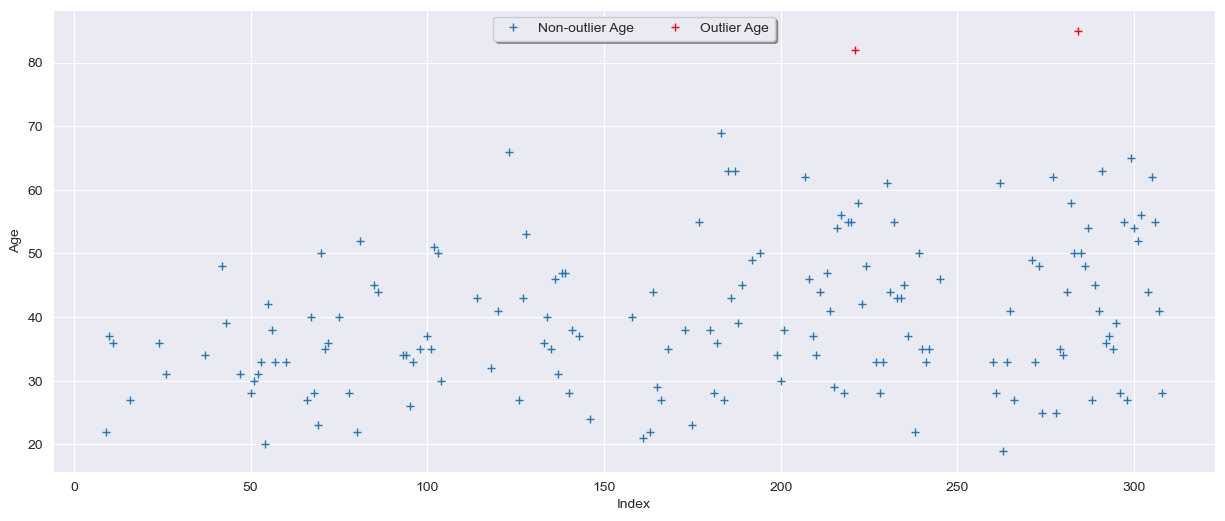

In [5]:
# Plotting outliers
def plot_binary_outliers(dataset, col, outlier_col):
    """
    Plot outliers in case of a binary outlier score. Here, the col specifies the real data
    column and outlier_col the columns with a binary value (outlier or not).

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): Column that you want to plot
        outlier_col (string): Outlier column marked with true/false
        reset_index (bool): whether to reset the index for plotting
    """

    # dataset.dropna()

    fig, ax = plt.subplots(figsize=(15, 6))

    plt.xlabel("Index")
    plt.ylabel("Age")

    # Non-outliers in default blue color
    ax.plot(
        dataset.index[~dataset[outlier_col]], dataset[col][~dataset[outlier_col]], "+"
    )
    # Outliers in red color
    ax.plot(
        dataset.index[dataset[outlier_col]], dataset[col][dataset[outlier_col]], "r+"
    )

    plt.legend(
        ["Non-outlier " + col, "Outlier " + col],
        loc="upper center",
        ncol=2,
        fancybox=True,
        shadow=True,
    )

    plt.savefig("./figures/outliers.png")


# Plot single column
plot_binary_outliers(dataset=dataset, col=col, outlier_col=col + "_outlier")


# *** DROP THE EXTREME VALUES ***#
#!!!!!!!!!!!

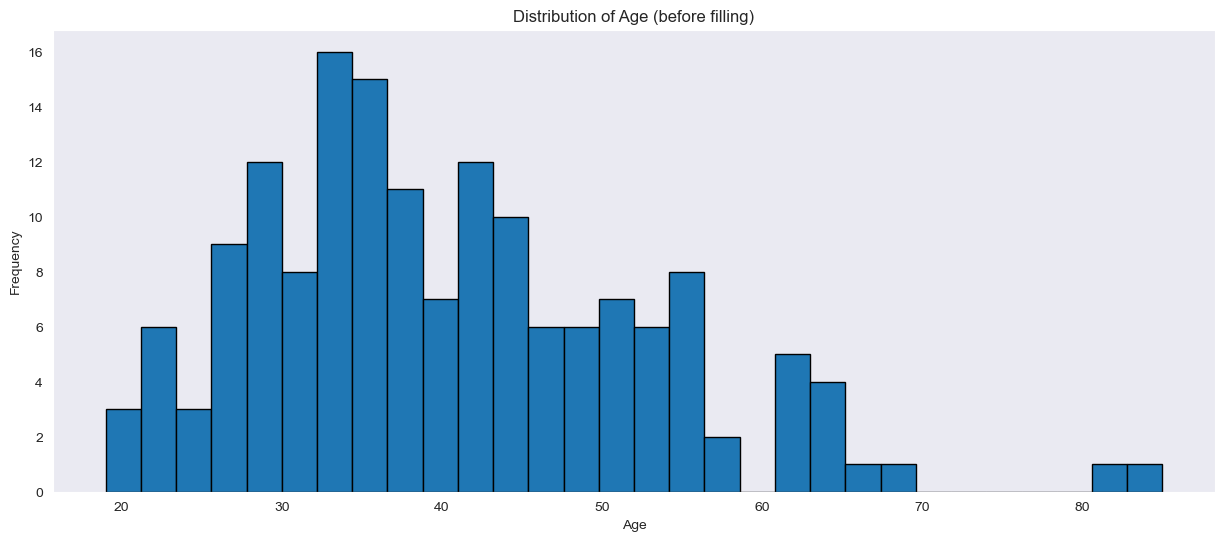

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            310 non-null    object 
 1   Date            310 non-null    object 
 2   Age             310 non-null    float64
 3   Expedition      310 non-null    object 
 4   Nationality     310 non-null    object 
 5   Cause of death  310 non-null    object 
 6   Location        310 non-null    object 
 7   Age_outlier     310 non-null    bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 17.4+ KB


' \nnth_row = data.iloc[243 && 275] # Should we remove or not? Name?\ndata[data["Name"] == "Unknown climber"]\ndata = data[data["Name"] != "Unknown climber"]\n'

In [6]:
### IDENTIFY COLUMNS WITH MISSING/NaN values ###
df.isnull()
missing_values = df.isnull().any()


### REPLACING MISSING VALUE FOR NUMERICAL COLUMNS "Age" ###
def age_distribution():
    plt.figure(figsize=(15, 6))
    df["Age"].hist(bins=30, edgecolor="black")
    plt.title("Distribution of Age (before filling)")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.savefig("./figures/age_distribution.png")
    plt.show()


age_distribution()

"""
WHY WE CHOSE median() INSTEAD OF mean():

Show the distribution of Age after being filled, as to why we choose median()
It leans more towards a skewed distribution rather than a normal,
since there's a significant amount of data points in the lower age range below 40.
The presence of a few outliers such as above 80, which are significantly lower than the majority of the data,
causes the distribution to be more skewed.
"""

"""
For example, in the dataset [1, 2, 3, 100], the mean is (1 + 2 + 3 + 100) / 4 = 106 / 4 = 26.5, 
which is significantly affected by the outlier (100). 
However, the median, which is the average of 2 and 3, is (2 + 3) / 2 = 2.5, 
a value that more accurately reflects the center of the majority of the data points.
"""

# median() is also preferred for numerical data such as "Age" rather than mode().

# Median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Mode
# data['Age'].fillna(value=data['Age'].mode()[0], inplace=True)


### REPLACING MISSING VALUES FOR CATEGORICAL COLUMNS WITH mode() ###
for column in ["Expedition", "Nationality", "Cause of death", "Location"]:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

df.info()
df.head(20)




""" 
nth_row = data.iloc[243 && 275] # Should we remove or not? Name?
data[data["Name"] == "Unknown climber"]
data = data[data["Name"] != "Unknown climber"]
"""

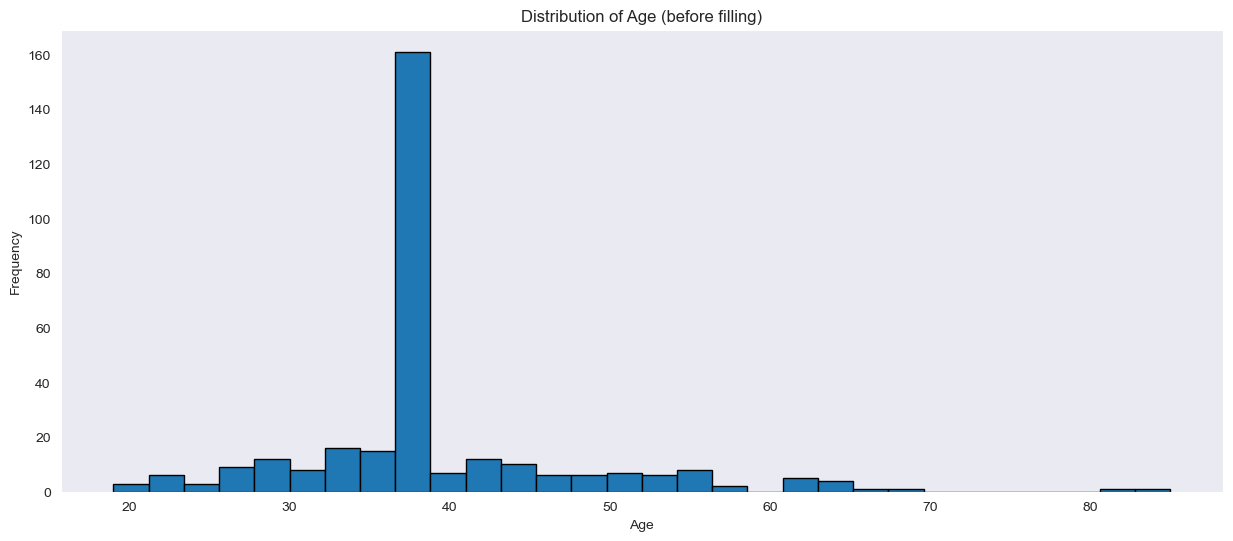

C:\Users\chris\AppData\Local\Temp\ipykernel_26932\3175865256.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


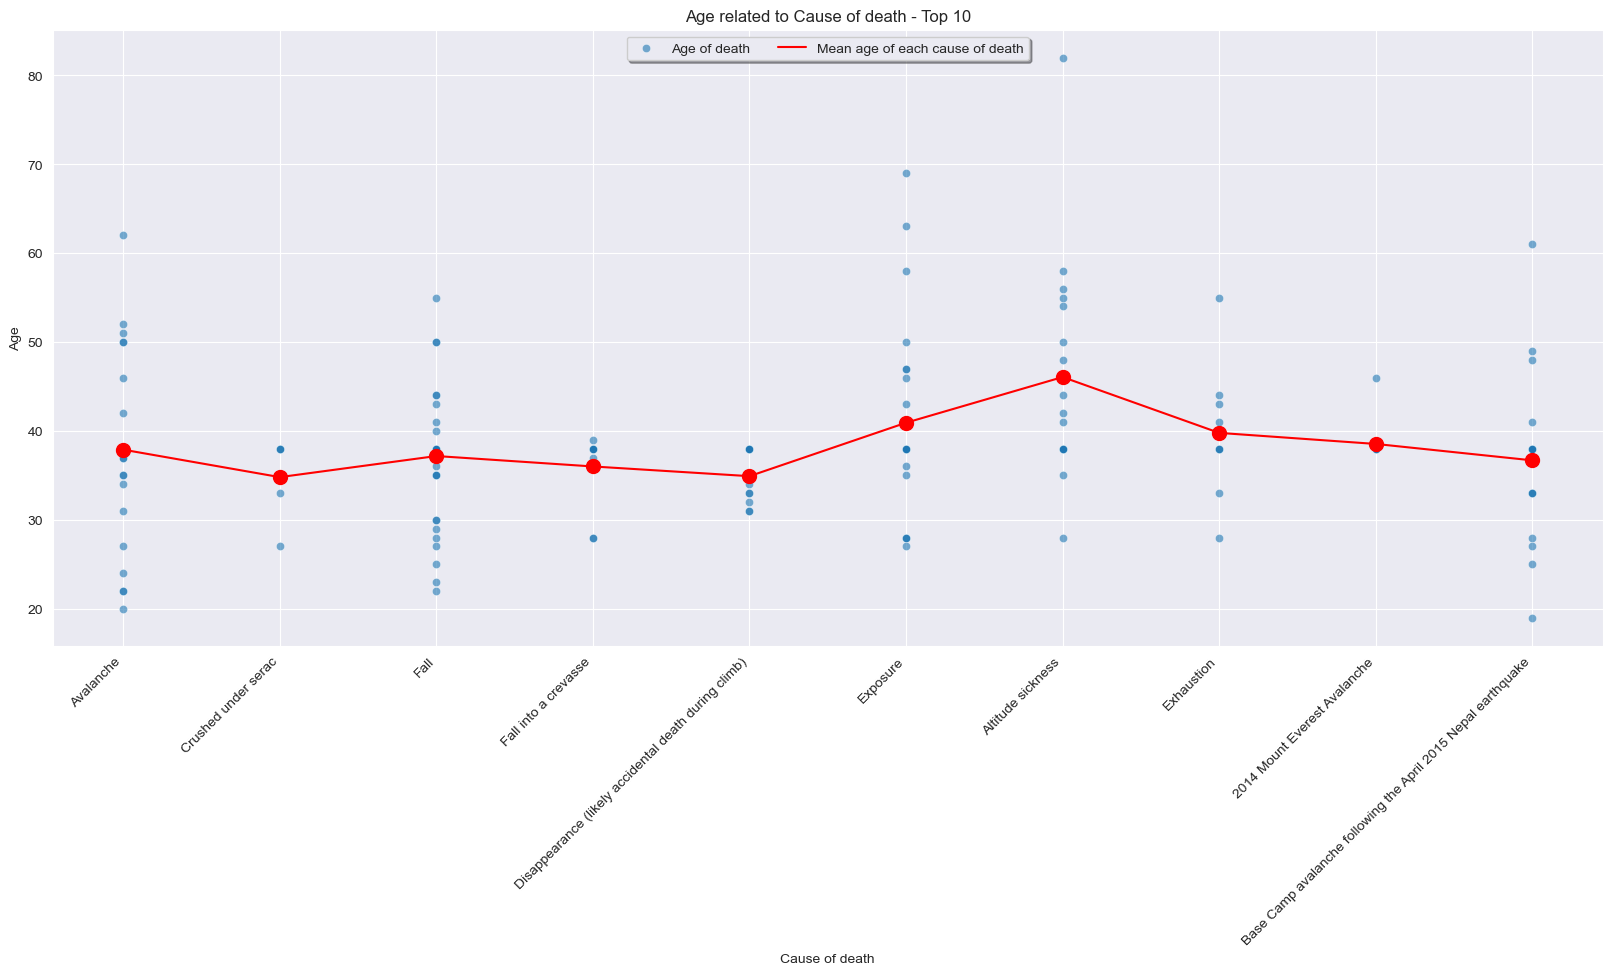

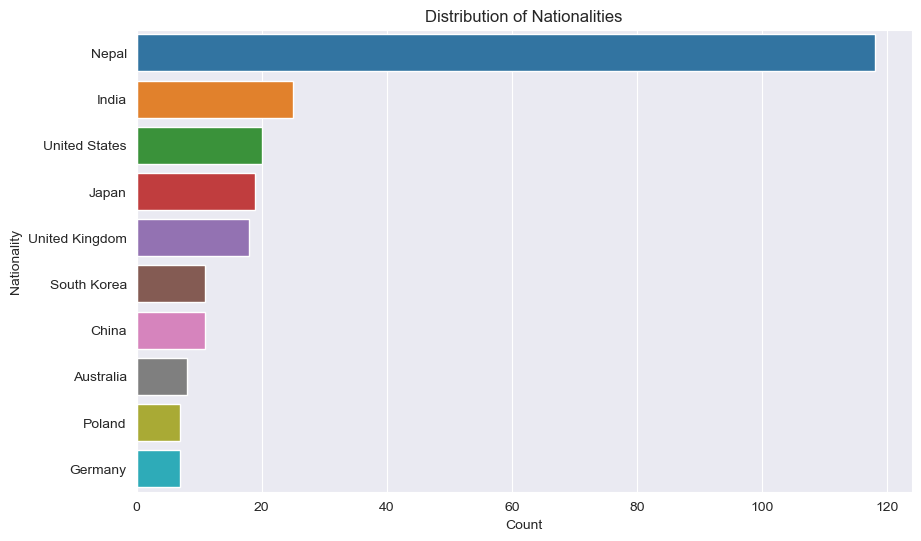

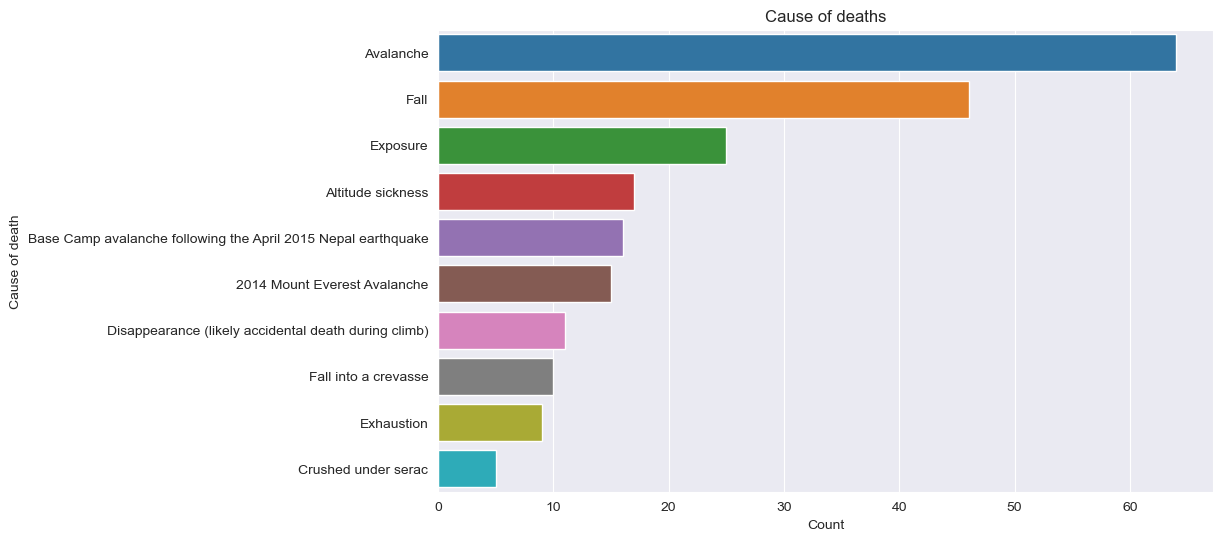

In [7]:
# --------------------------------------------------------------
# 4. Data Visualization
# --------------------------------------------------------------


def data_visualization_plots():

    # Distribution of Age after filling missing values
    age_distribution()

    # Age related to Cause of death
    top_n_cod = df["Cause of death"].value_counts().head(10).index
    df_limited_cod = df[df["Cause of death"].isin(top_n_cod)]

    plt.figure(figsize=(20, 8))
    sns.scatterplot(x="Cause of death", y="Age", data=df_limited_cod, alpha=0.6)

    mean_ages = df_limited_cod.groupby("Cause of death")["Age"].mean()

    sns.lineplot(
        x="Cause of death",
        y="Age",
        data=df_limited_cod,
        estimator="mean",
        ci=None,
        color="red",
    )

    plt.scatter(mean_ages.index, mean_ages.values, color="red", s=100)

    plt.xticks(rotation=45, ha="right")
    plt.title("Age related to Cause of death - Top 10")
    plt.xlabel("Cause of death")
    plt.ylabel("Age")

    plt.legend(
        ["Age of death", "Mean age of each cause of death"],
        loc="upper center",
        ncol=2,
        fancybox=True,
        shadow=True,
    )

    plt.savefig("./figures/age_related_to_cod.png")
    plt.show()

    # Most occuring nationalities
    top_n = 10
    top_categories = df["Nationality"].value_counts().index[:top_n]

    plt.figure(figsize=(10, 6))
    sns.countplot(y="Nationality", data=df, order=top_categories)
    plt.title("Distribution of Nationalities")
    plt.xlabel("Count")
    plt.ylabel("Nationality")
    plt.savefig("./figures/most_occuring_nationalities.png")
    plt.show()

    # Most common causes of death
    top_n = 10
    top_categories = df["Cause of death"].value_counts().index[:top_n]

    plt.figure(figsize=(10, 6))
    sns.countplot(y="Cause of death", data=df, order=top_categories)
    plt.title("Cause of deaths")
    plt.xlabel("Count")
    plt.ylabel("Cause of death")
    plt.savefig("./figures/most_common_causes_of_death.png")
    plt.show()


data_visualization_plots()

In [ ]:
# Creating pickle file
df.to_pickle("../OLA-1/data/interim/task1_data_processed.pkl")